In [12]:
import pandas as pd
import time
from sdv.metadata import Metadata
from sdv.metadata import SingleTableMetadata
from sdv.single_table import TVAESynthesizer, CTGANSynthesizer, GaussianCopulaSynthesizer

In [2]:
# Cargar los datos reales
df = pd.read_csv("final_static_data.csv") 

In [3]:
# Obtener los tipos de barco únicos
ship_types = df["shiptype"].unique()

In [4]:
# Diccionario para almacenar los datos generados
synthetic_data_all = {"TVAE": [], "GaussianCopula": [], "CTGAN": []}
computation_times = {"TVAE": {}, "GaussianCopula": {}, "CTGAN": {}}


In [8]:
# Obtener las proporciones reales de cada tipo de barco
shiptype_counts = df["shiptype"].value_counts(normalize=True)

In [9]:
# Número total de datos sintéticos a generar
num_total_synthetic = 50000

In [10]:
for shiptype, proportion in shiptype_counts.items():
    num_samples = int(num_total_synthetic * proportion)  # Ajustar según la proporción real
    print(f"\n Generando {num_samples} datos para tipo de barco: {shiptype} ({proportion:.2%} del total)")
    
    # Filtrar los datos del tipo de barco actual
    df_ship = df[df["shiptype"] == shiptype]
    
    # Definir metadatos del dataset
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df_ship)
    
    # Crear sintetizadores
    synthesizers = {
        "TVAE": TVAESynthesizer(metadata),
        "GaussianCopula": GaussianCopulaSynthesizer(metadata),
        "CTGAN": CTGANSynthesizer(metadata)
    }
    
    for method, synthesizer in synthesizers.items():
        print(f"Entrenando {method} para {shiptype}...")
        start_time = time.time()
        synthesizer.fit(df_ship)
        end_time = time.time()
        computation_times[method][shiptype] = end_time - start_time  # Guardar tiempo por barco
        
        # Generar datos sintéticos según la proporción original
        synthetic_data_ship = synthesizer.sample(num_rows=num_samples)
        synthetic_data_ship["shiptype"] = shiptype  # Restaurar la categoría
        synthetic_data_all[method].append(synthetic_data_ship)



 Generando 24353 datos para tipo de barco: ShipType.Cargo (48.71% del total)
Entrenando TVAE para ShipType.Cargo...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Cargo...
Entrenando CTGAN para ShipType.Cargo...

 Generando 9903 datos para tipo de barco: ShipType.Tanker (19.81% del total)
Entrenando TVAE para ShipType.Tanker...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Tanker...
Entrenando CTGAN para ShipType.Tanker...

 Generando 6415 datos para tipo de barco: ShipType.Tug (12.83% del total)
Entrenando TVAE para ShipType.Tug...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Tug...
Entrenando CTGAN para ShipType.Tug...

 Generando 6117 datos para tipo de barco: ShipType.Fishing (12.24% del total)
Entrenando TVAE para ShipType.Fishing...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Fishing...
Entrenando CTGAN para ShipType.Fishing...

 Generando 3209 datos para tipo de barco: ShipType.Passenger (6.42% del total)
Entrenando TVAE para ShipType.Passenger...


/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/jupyterhub/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Entrenando GaussianCopula para ShipType.Passenger...
Entrenando CTGAN para ShipType.Passenger...


In [14]:
# Crear un diccionario para almacenar cada metadata
metadata_all = {
    'TVAE': Metadata.detect_from_dataframe(data=df, table_name='AIS_estaticos_TVAE'),
    'GaussianCopula': Metadata.detect_from_dataframe(data=df, table_name='AIS_estaticos_Gaussian'),
    'CTGAN': Metadata.detect_from_dataframe(data=df, table_name='AIS_estaticos_CTGAN')
}
# Guardar la metadata a un archivo JSON
for method, data in synthetic_data_all.items():
    metadata_all[method].save_to_json(f"metadata_comlpeto_shiptype_{method}.json")
    print(f"Metadatos de {method} guardados en 'metadata_completo_shiptype_{method}.json'.")

Metadatos de TVAE guardados en 'metadata_completo_shiptype_TVAE.json'.
Metadatos de GaussianCopula guardados en 'metadata_completo_shiptype_GaussianCopula.json'.
Metadatos de CTGAN guardados en 'metadata_completo_shiptype_CTGAN.json'.


In [18]:
# Guardar los datos generados en CSVs
for method, data in synthetic_data_all.items():
    final_synthetic_data = pd.concat(data, ignore_index=True)
    final_synthetic_data = final_synthetic_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Mezclar los datos
    final_synthetic_data.to_csv(f"synthetic_static_completo_{method}.csv", index=False)
    print(f" Datos sintéticos generados con {method} guardados en 'synthetic_static_completo_{method}.csv'.")


 Datos sintéticos generados con TVAE guardados en 'synthetic_static_completo_TVAE.csv'.
 Datos sintéticos generados con GaussianCopula guardados en 'synthetic_static_completo_GaussianCopula.csv'.
 Datos sintéticos generados con CTGAN guardados en 'synthetic_static_completo_CTGAN.csv'.


In [26]:
for method in ["TVAE", "GaussianCopula", "CTGAN"]:
    # Cargar el CSV generado
    df_synthetic = pd.read_csv(f"synthetic_static_completo_{method}.csv")
    
    # Mostrar 5 filas 
    print(f"Primeras 5 filas de {method}:")
    print(df_synthetic.head(5))  # Muestra aleatoria
    
    print("\n" + "-"*50 + "\n")  # Separador entre salidas

Primeras 5 filas de TVAE:
       MMSI   draught      to_bow    to_stern    to_port  to_starboard  \
0  14374624  8.569754  146.556322   34.386109  21.220992      6.468825   
1  15466187  8.432990  169.514328   18.014104  22.999470     11.931708   
2  14981267  8.308049  119.097571   21.373788  10.128303      9.871043   
3   8090997  8.696925   32.868165  179.107409  20.016717     29.094309   
4   5591053  2.624793   12.923174   13.654256   3.025459      2.992804   

          len        wid     ldivw      ldivd     wdivd          area  \
0  182.010520  26.601793  5.776739  21.952104  3.539978   5224.851158   
1  191.565153  32.030762  6.151720  25.906746  3.933445   6375.747682   
2  172.354537  21.779436  6.571282  19.218253  3.137491   3583.483849   
3  122.459446  45.576002  3.515002  18.909471  3.459737  13473.865672   
4   27.260042   6.994532  4.232264  11.290253  2.753880    183.011771   

        grith          aml         amt            vs       aol  \
0  212.114106  1795.9080

In [27]:
# Mostrar tiempos de computación
print("\n Tiempos de computación por método y tipo de barco (completo):")
for method, times in computation_times.items():
    for shiptype, time_taken in times.items():
        print(f"{method} - {shiptype}: {time_taken:.2f} segundos")


 Tiempos de computación por método y tipo de barco (completo):
TVAE - ShipType.Cargo: 182.51 segundos
TVAE - ShipType.Tanker: 54.56 segundos
TVAE - ShipType.Tug: 36.19 segundos
TVAE - ShipType.Fishing: 35.41 segundos
TVAE - ShipType.Passenger: 18.53 segundos
GaussianCopula - ShipType.Cargo: 3.72 segundos
GaussianCopula - ShipType.Tanker: 1.93 segundos
GaussianCopula - ShipType.Tug: 1.61 segundos
GaussianCopula - ShipType.Fishing: 1.56 segundos
GaussianCopula - ShipType.Passenger: 1.21 segundos
CTGAN - ShipType.Cargo: 290.13 segundos
CTGAN - ShipType.Tanker: 87.16 segundos
CTGAN - ShipType.Tug: 57.59 segundos
CTGAN - ShipType.Fishing: 55.09 segundos
CTGAN - ShipType.Passenger: 26.30 segundos


In [21]:
# Convertir los tiempos en un DataFrame para análisis posterior
data_plot = []
for method, times in computation_times.items():
    for shiptype, time_taken in times.items():
        data_plot.append({"Método": method, "Tipo de Barco": shiptype, "Tiempo (s)": time_taken})

df_times = pd.DataFrame(data_plot)


In [22]:
# Guardar los tiempos en un CSV
df_times.to_csv("computation_times_ESTATICOS.csv", index=False)
print("Tiempos de computación guardados en 'computation_times_ESTATICOS.csv'")

Tiempos de computación guardados en 'computation_times_ESTATICOS.csv'


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Cargar el archivo CSV que contiene los tiempos de computación
archivo_csv = "computation_times_ESTATICOS.csv"  
df_times_plot = pd.read_csv(archivo_csv)

In [30]:
# Verificar los primeros registros para asegurarse de que se cargó correctamente
print(df_times_plot.head())

  Método       Tipo de Barco  Tiempo (s)
0   TVAE      ShipType.Cargo  182.510310
1   TVAE     ShipType.Tanker   54.560515
2   TVAE        ShipType.Tug   36.187218
3   TVAE    ShipType.Fishing   35.408803
4   TVAE  ShipType.Passenger   18.527839


In [31]:
# Obtener los métodos únicos en el DataFrame
metodos_unicos = df_times_plot['Método'].unique()

/tmp/ipykernel_68552/2124226152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],


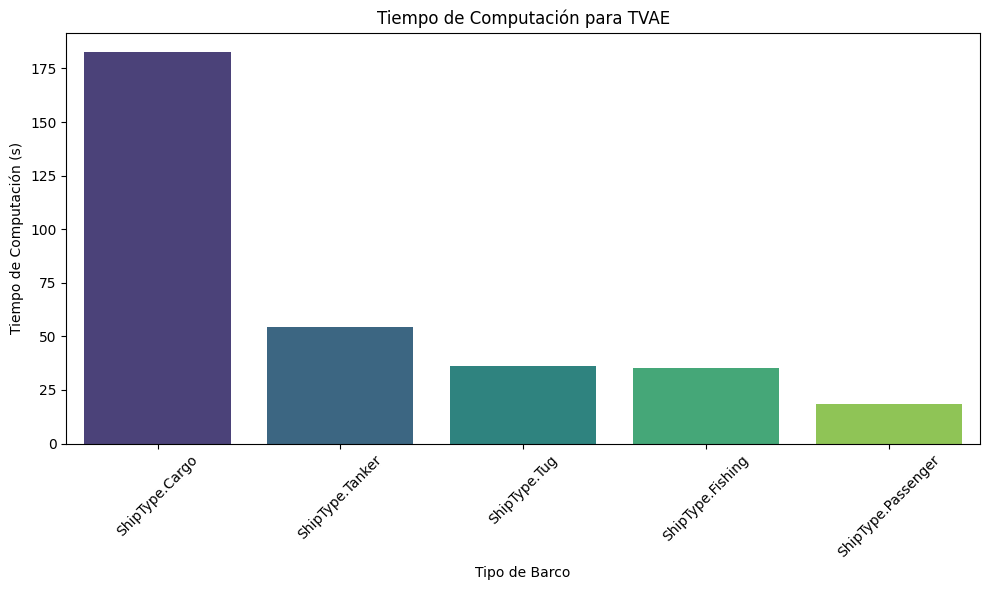

/tmp/ipykernel_68552/2124226152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],


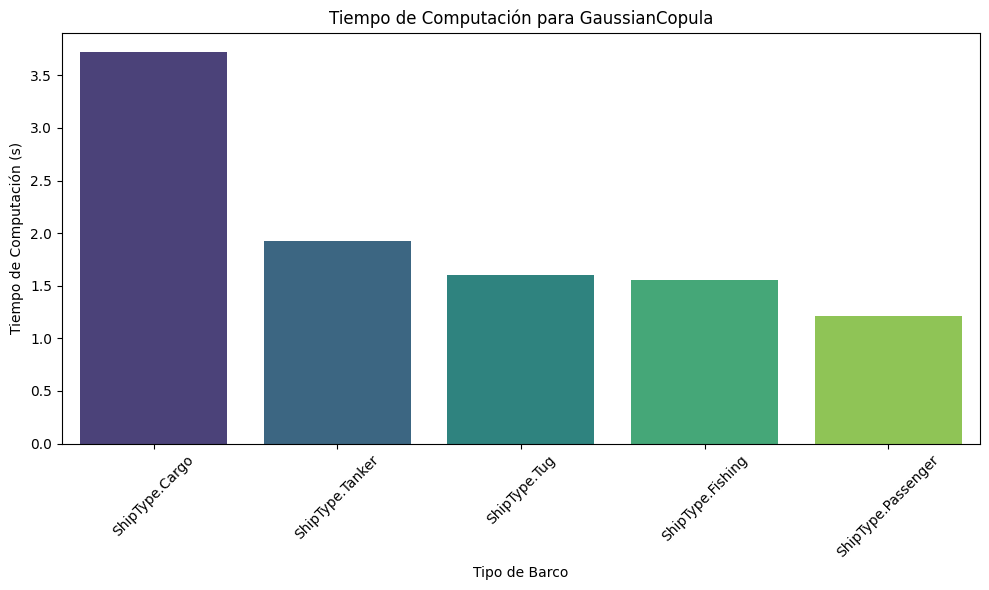

/tmp/ipykernel_68552/2124226152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],


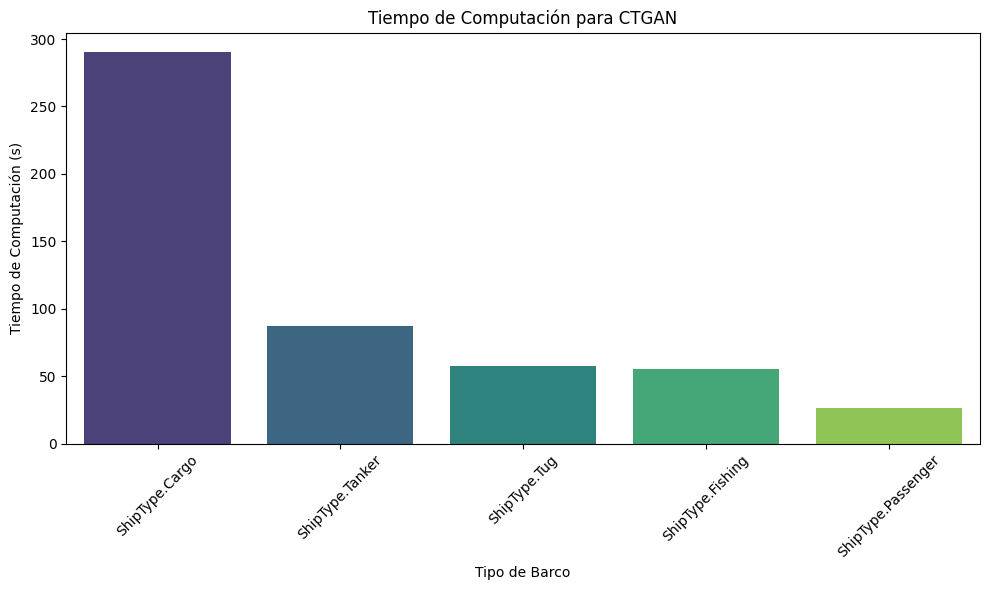

In [32]:
# Crear gráficos para cada método
for metodo in metodos_unicos:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_times_plot[df_times_plot['Método'] == metodo],
                x='Tipo de Barco',
                y='Tiempo (s)',
                palette='viridis')

    plt.title(f'Tiempo de Computación para {metodo}')
    plt.xlabel('Tipo de Barco')
    plt.ylabel('Tiempo de Computación (s)')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ajustar el layout
    plt.show()

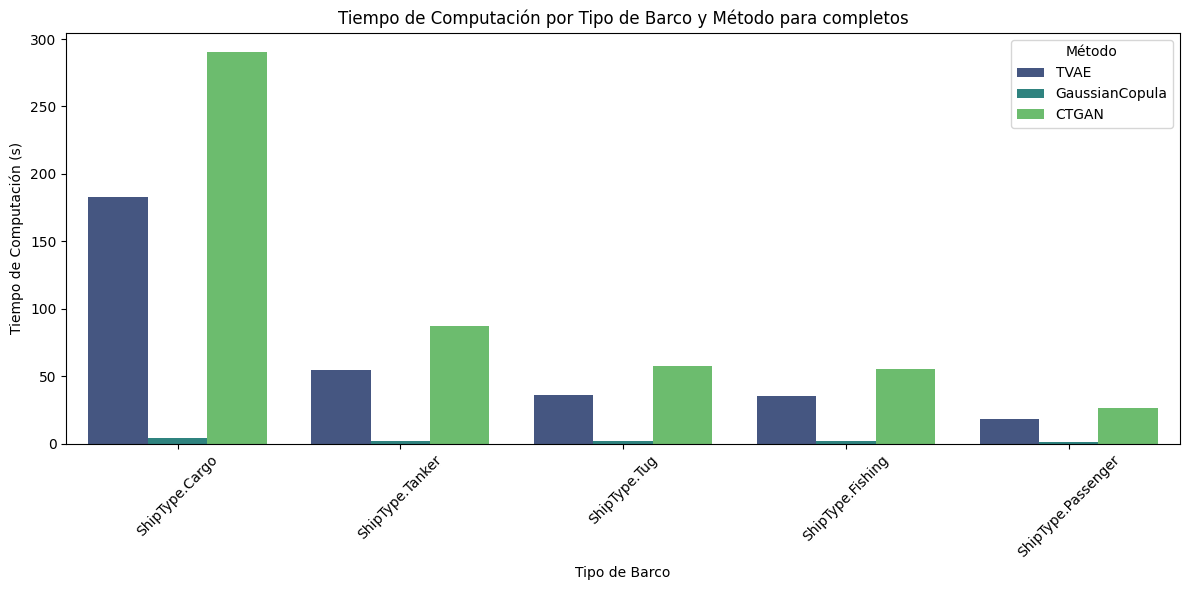

In [34]:
# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_times_plot, x='Tipo de Barco', y='Tiempo (s)', hue='Método', palette='viridis')

# Personalización del gráfico
plt.title("Tiempo de Computación por Tipo de Barco y Método para completos")
plt.xlabel('Tipo de Barco')
plt.ylabel('Tiempo de Computación (s)')
plt.legend(title='Método')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el layout para que no se solapen los textos

# Mostrar el gráfico
plt.show()